In [1]:
import emlddmm
%matplotlib notebook
import requests
from os.path import join,split,splitext,exists


In [2]:
reference_url = 'https://download.brainlib.org/hackathon/2022_GYBS/input/fMOST/reference/average_template_25_mm_ASL.nii.gz'
subject_url = 'https://download.brainlib.org/hackathon/2022_GYBS/input/fMOST/subject/194062_red_mm_SLA.nii.gz'

In [3]:
reference_filename = split(reference_url)[-1]
subject_filename = split(subject_url)[-1]
reference_filename,subject_filename

('average_template_25_mm_ASL.nii.gz', '194062_red_mm_SLA.nii.gz')

In [4]:
if not exists(reference_filename):
    r = requests.get(reference_url, stream=True)
    with open(reference_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)  
else:
    print(f'{reference_filename} already exists')

if not exists(subject_filename):
    r = requests.get(subject_url, stream=True)
    with open(subject_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)     
else:
    print(f'{subject_filename} already exists')

average_template_25_mm_ASL.nii.gz already exists
194062_red_mm_SLA.nii.gz already exists


Opening with nibabel, note only 3D images supported
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 528 320 456   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.025 0.025 0.025 0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -11.375
qoffset_y       :

<IPython.core.display.Javascript object>


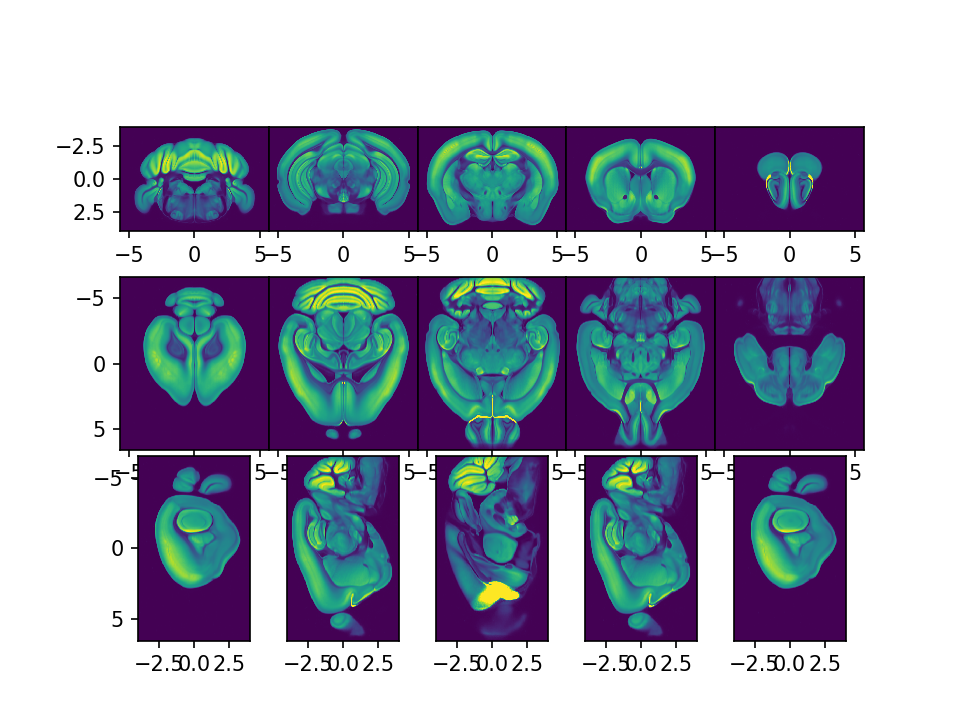

(<Figure size 640x480 with 15 Axes>,
 [[<matplotlib.axes._subplots.AxesSubplot at 0x7f50a46affd0>,
   <matplotlib.axes._subplots.AxesSubplot at 0x7f4fb6a775d0>]])

In [5]:
xI,I,_,_ = emlddmm.read_data(reference_filename)
emlddmm.draw(I,xI)

In [6]:
xJ,J,_,_ = emlddmm.read_data(subject_filename)
#emlddmm.draw(J,xJ) # don't display image is too big

Opening with nibabel, note only 3D images supported
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   3  661 1029 1125    1    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   0.01 0.01 0.01 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -10.28
qoffset_y       : -0.

In [7]:
[x[1]-x[0] for x in xJ]

[0.009999999776482582, 0.009999999776482582, 0.009999999776482582]